# 🐾 Pet Breed Image Classification 

- Valentina Ozornina v055@drexel.edu 
- Naren Garapati ng658@drexel.edu

## Project Overview

This project focuses on building a **multi-class image classification model** to predict the breed of a pet from an image, using the **Oxford-IIIT Pet Dataset**. The dataset contains images of cats and dogs across **37 distinct breeds**. Our objective is to design models that are both accurate and interpretable.

## Dataset Exploration

### Basic Dataset Information

- Dataset: Oxford-IIIT Pet Dataset
- Total Images: 7390
- Number of Breeds: 37
- Image Types: Primarily RGB, a few Grayscale

### Dataset Highlights:
- **Images**: 7,390 (about 200 images per breed)
- **Number of Breeds**: 37 breeds (both cats and dogs)
- **Image Format**: JPEG (varied sizes, typically around 350x450 pixels)
- **Image Color Types**:
  - **Grayscale**: 3 images (out of the 7,390)
  - **Colored**: The rest of the images (7,387 images) are in color (RGB)
- **Labels**: Breed of the pet (categorical data: 37 distinct classes)
- **Files Not in JPG Format**: There are 3 files in the dataset that are not in `.jpg` format. These files are:
    - **Abyssinian_100.mat**
    - **Abyssinian_101.mat**
    - **Abyssinian_102.mat**

    - We will not use these files in the project since they are not in the required image format (JPG).

In [38]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

dataset_dir = 'images'

# List all the .jpg files in the dataset folder
image_files = [f for f in os.listdir(dataset_dir) if f.endswith('.jpg')] 

def get_breed_label(filename):
    # Split filename on underscores, remove the last part (identifier number)
    name_parts = filename.split('_')[:-1]
    
    # Join the breed parts back together to form the full breed name (e.g., "English Setter")
    breed_name = ' '.join(name_parts).capitalize() 
    return breed_name

# Extract breed labels from filenames (e.g., "english_setter_137.jpg" -> "English Setter")
breed_labels = [get_breed_label(f) for f in image_files]

# Total number of images
total_images = len(image_files)
print(f"Total images: {total_images}")

# Count the number of images per breed
breed_counts = Counter(breed_labels)

# Total number of breeds
total_breeds = len(breed_counts)
print(f"\nTotal number of unique breeds: {total_breeds}")


Total images: 7390

Total number of unique breeds: 37


In [47]:
# List files that are not .jpg
non_jpg_files = [f for f in os.listdir(dataset_dir) if not f.endswith('.jpg')]

# Print the non-jpg files
print("Non-JPG files:")
for file in non_jpg_files:
    print(file)

Non-JPG files:
Abyssinian_100.mat
Abyssinian_101.mat
Abyssinian_102.mat


In [39]:
# Convert the breed counts into DataFrame
df = pd.DataFrame(list(breed_counts.items()), columns=['breed', 'count'])

# Capitalize both words in breed names 
df['breed'] = df['breed'].apply(lambda x: ' '.join([word.capitalize() for word in x.split()])) 

# Sort the DataFrame by breed name
df_sorted = df.sort_values(by='breed').reset_index(drop=True)

In [40]:
df_sorted

,breed,count
0,Abyssinian,200
1,American Bulldog,200
2,American Pit Bull Terrier,200
3,Basset Hound,200
4,Beagle,200
5,Bengal,200
6,Birman,200
7,Bombay,200
8,Boxer,200
9,British Shorthair,200


In [41]:
df_sorted.shape

(37, 2)

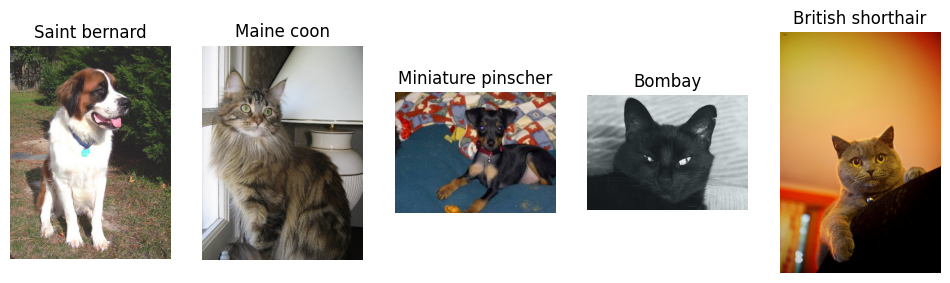

In [42]:
import random
from matplotlib.image import imread

# Select random examples (5 random images)
num_samples = 5
random_samples = random.sample(list(zip(image_files, breed_labels)), num_samples)

# Plot the random images with their breed labels
plt.figure(figsize=(12, 8))

for i, (img_file, breed) in enumerate(random_samples):
    img_path = os.path.join(dataset_dir, img_file)
    img = imread(img_path)
    
    plt.subplot(1, num_samples, i+1)
    plt.imshow(img)
    plt.title(breed) 
    plt.axis('off')

plt.show()


In [43]:
# Store image metadata
image_metadata = []

# Loop through each image file to collect its metadata (filename, height, width, color type)
for img_file in image_files:
    img_path = os.path.join(dataset_dir, img_file)
    img = imread(img_path)
    
    if len(img.shape) == 3:
        height, width, _ = img.shape  # RGB image
        color_type = 'RGB'
    else:
        height, width = img.shape  # Grayscale image
        color_type = 'Grayscale'
    
    # Append metadata to the list
    image_metadata.append((img_file, height, width, color_type))

# Create a DataFrame for metadata
df_metadata = pd.DataFrame(image_metadata, columns=['filename', 'height', 'width', 'color_type'])

In [44]:
df_metadata.head()

,filename,height,width,color_type
0,Abyssinian_1.jpg,400,600,RGB
1,Abyssinian_10.jpg,500,375,RGB
2,Abyssinian_100.jpg,500,394,RGB
3,Abyssinian_101.jpg,313,450,RGB
4,Abyssinian_102.jpg,465,500,RGB


In [45]:
df_metadata.describe()

,height,width
count,7390.000000,7390.000000
mean,390.913667,436.745196
std,109.586324,115.877300
min,103.000000,114.000000
25%,333.000000,335.000000
50%,375.000000,500.000000
75%,500.000000,500.000000
max,2606.000000,3264.000000


In [46]:
df_metadata[df_metadata['color_type'] == 'Grayscale']

,filename,height,width,color_type
2233,Egyptian_Mau_129.jpg,325,299,Grayscale
6899,staffordshire_bull_terrier_2.jpg,282,500,Grayscale
6905,staffordshire_bull_terrier_22.jpg,500,364,Grayscale


##  Planned Approaches

To build a strong model, we will explore multiple approaches:

### 1. Convolutional Neural Networks (CNN)
We will design a **custom CNN model** from scratch. This will serve as a simple, interpretable baseline. We will monitor validation accuracy and losses to guide improvements.

### 2. Transfer Learning
We will leverage **pre-trained CNNs** like **ResNet50** and **MobileNetV2**. Transfer learning can significantly boost performance, as these models already understand general visual features from large datasets like ImageNet.

- **ResNet50:** Powerful but heavier in parameters.
- **MobileNetV2:** Lightweight and efficient, suitable for faster inference.

These models will be fine-tuned on our dataset.

### 3. Traditional Machine Learning (K-Nearest Neighbors/SVM)
We will also use **K-Nearest Neighbors (KNN)** on features extracted from the pre-trained CNNs. SVM's can also be potentially used since they work with highly dimensional data. 

- Quick to train
- Useful baseline to compare with deep learning models
- **Purpose:** To apply **SVMs** after extracting features from the pre-trained CNNs. SVM is a supervised machine learning algorithm well-suited for high-dimensional feature spaces.

- **Rationale:** SVMs can handle non-linear decision boundaries and work well for image classification tasks, especially when the feature space is large and complex. Comparing SVM to CNNs will allow us to evaluate how traditional machine learning models perform in comparison to deep learning approaches.


## Challenges and Considerations

- **Grayscale Images:** Convert to RGB for consistency.
- **Varying Image Sizes:** All images will be resized to a uniform size during preprocessing.
- **Overfitting:** Data augmentation will be used to improve generalization and in the unlikely case we would need more data for training 




## Potential Applications

Some ways a pet breed classification model could be useful:

- **Veterinary Clinics:**  
  Quickly suggest possible breeds when breed information is missing.

- **Animal Shelters:**  
  Help label new animals and update adoption profiles more easily.

- **Lost and Found Services:**  
  Match lost pets to listings faster by breed recognition.

- **Pet Apps:**  
  Let users identify the breed of a pet just by taking a photo.

- **Insurance and Services:**  
  Some services depend on the pet’s breed; this could help automate that process.

- **Research and Dataset Building:**  
  Make it easier to tag large numbers of pet photos for training or research projects.





## Summary

This project will involve building a **multi-class classification model** to predict the breed of a pet from an image, using the **Oxford-IIIT Pet Dataset**. The dataset contains images of cats and dogs across **37 breeds**.
We will apply a combination of CNN, transfer learning, and traditional machine learning algorithms to solve the problem. We will focus on both model performance and interpretability.

